In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [30]:
df = pd.read_csv('2019.csv')

In [31]:
df.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb', 'GS', 'Age', 'Tgt', 'Y/A', 'Att', 'Att.1', 'Cmp', 'Y/R'], axis=1, inplace=True)

df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

df.rename({
    'TD' : 'PassingTD',
    'TD.1' : 'RushingTD',
    'TD.2' : 'ReceivingTD',
    'TD.3' : 'TotalTD',
    'Yds' : 'PassingYds',
    'Yds.1' : 'RushingYds',
    'Yds.2' : 'ReceivingYds',    
}, axis=1, inplace=True)

In [32]:
df['FantasyPoints'] = (df['PassingYds']*0.1 + df['Rec'] + df['PassingTD']*6 -df['Int']*2 + df['RushingYds']*0.1 + df['RushingTD']*6 + df['ReceivingYds']*0.1 + df['ReceivingTD']*6 - df['FL']*2)

df['FantasyPoints/GM'] = df['FantasyPoints']/df['G']

df['Rec/GM'] = df['Rec']/df['G']


In [49]:
df = df[df['Tm'] != '2TM']
df = df[df['Tm'] != '3TM']
df = df[df['Rec/GM'] > 2, (np.where(['FantPos'] != 'QB'))]


df = df[['Tm', 'FantPos', 'FantasyPoints', 'FantasyPoints/GM', 'Rec/GM']]

rb_df = df[df['FantPos'] == 'RB']
qb_df = df[df['FantPos'] == 'QB']
wr_df = df[df['FantPos'] == 'WR']
te_df = df[df['FantPos'] == 'TE']

qb_df.head()

TypeError: '(0       True
2      False
3       True
4       True
5       True
       ...  
576    False
578    False
597    False
599    False
601    False
Name: Rec/GM, Length: 451, dtype: bool, (array([0], dtype=int64),))' is an invalid key

In [98]:
def get_top_players(df, n):
    return df.groupby('Tm').apply(lambda x: x.nlargest(n, ['FantasyPoints']).min()).reset_index(drop=True)

qb_df = get_top_players(qb_df, 1)
te_df = get_top_players(te_df, 1)
rb1_df = get_top_players(rb_df, 1)
rb2_df = get_top_players(rb_df, 2)
wr1_df = get_top_players(wr_df, 1)
wr2_df = get_top_players(wr_df, 2)
wr3_df = get_top_players(wr_df, 3)


In [46]:
new_names = {
    'QB1' : qb_df,
    'TE1' : te_df,
    'RB1' : rb1_df,
    'RB2' : rb2_df,
    'WR1' : wr1_df,
    'WR2' : wr2_df,
    'WR3' : wr3_df
}
    
for name, new_df in new_names.items():
    new_df.rename({'FantasyPoints/GM': name}, axis=1, inplace=True)
    new_df.drop(['FantPos', 'FantasyPoints', 'Rec/GM'], axis=1, inplace=True)
    new_df.set_index('Tm', inplace=True)
    
df = pd.concat([qb_df, te_df, rb1_df, rb2_df, wr1_df, wr2_df, wr3_df], axis=1)

corrMatrix = df.corr()

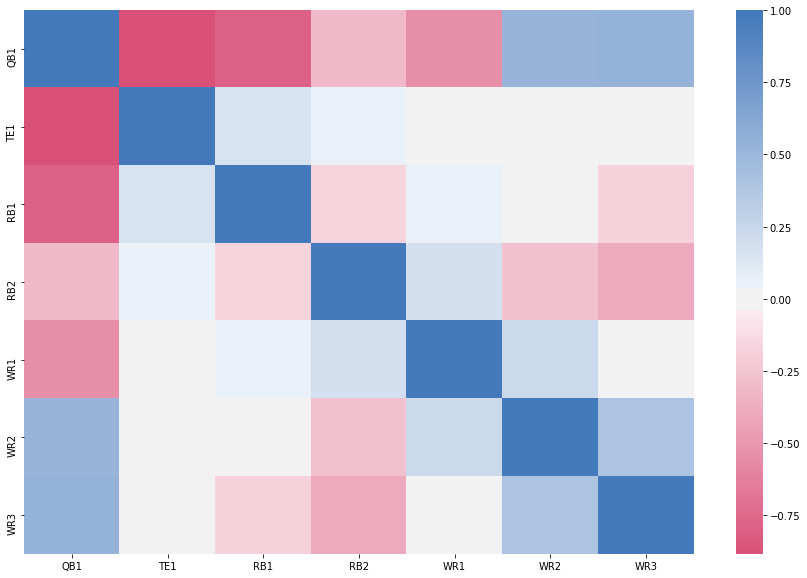

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

cmap = sns.diverging_palette(0, 250, as_cmap=True)

vizCorrMatrix = sns.heatmap(corrMatrix, cmap=cmap, center=0)

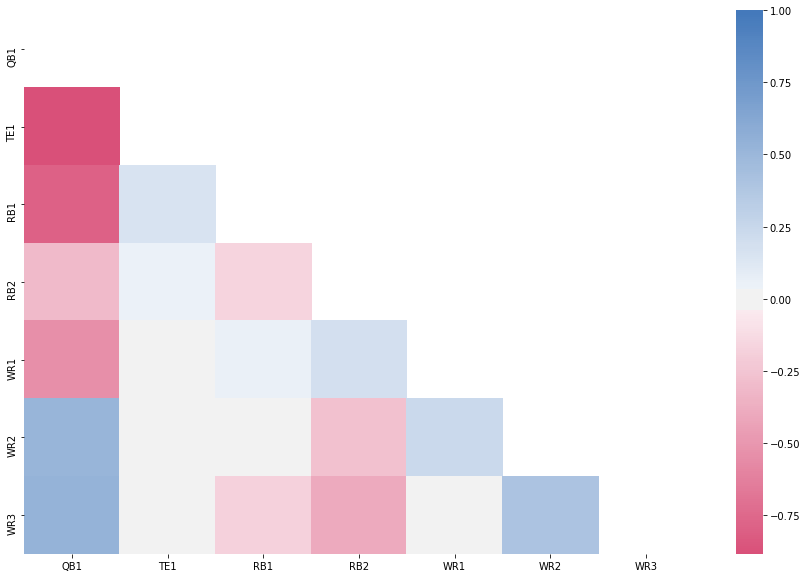

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

mask = np.zeros_like(corrMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

vizCorrMatrix = sns.heatmap(corrMatrix, mask=mask, cmap=cmap, center=0)